<a href="https://colab.research.google.com/github/PrajanyaJ/passwordchecker/blob/main/new_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.preprocessing import LabelEncoder

In [ ]:
data = pd.read_csv("/content/data1.csv", error_bad_lines=False)
print(data.head())

      password  strength
0     kzde5577         1
1     kino3434         1
2    visi7k1yr         1
3     megzy123         1
4  lamborghin1         1


<ipython-input-34-7d44cdd6c57e>:1: FutureWarning: The error_bad_lines argument has been deprecated and will be removed in a future version. Use on_bad_lines in the future.


  data = pd.read_csv("/content/data1.csv", error_bad_lines=False)


In [ ]:
data = data.dropna()
data["strength"] = data["strength"].map({0: "Weak",
                                         1: "Medium",
                                         2: "Strong"})
print(data.sample(5))

          password strength
161       afs34214   Medium
204  barboza221294   Medium
258      hosna1368   Medium
366       u03kz6ez   Medium
221      bellsuki1   Medium


In [ ]:
data['strength'].value_counts()

Medium    308
Weak       63
Strong     53
Name: strength, dtype: int64

In [ ]:
label_encode=LabelEncoder()

In [ ]:
labels=label_encode.fit_transform(data.strength)

In [ ]:
data['target']=labels

<Axes: xlabel='target', ylabel='count'>

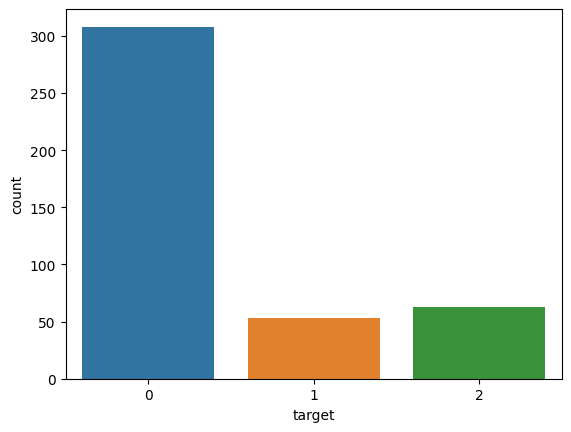

In [ ]:
sns.countplot(x='target',data=data)

In [ ]:
def word(password):
    character=[]
    for i in password:
        character.append(i)
    return character

x = np.array(data["password"])
y = np.array(data["strength"])

tdif = TfidfVectorizer(tokenizer=word)
x = tdif.fit_transform(x)
xtrain, xtest, ytrain, ytest = train_test_split(x, y,test_size=0.05, random_state=42)


/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
model = RandomForestClassifier()
model.fit(xtrain, ytrain)
print(model.score(xtest, ytest))

0.9090909090909091


In [ ]:
import getpass
user = getpass.getpass("Enter Password: ")
data = tdif.transform([user]).toarray()
output = model.predict(data)
print(output)

Enter Password: ··········
['Medium']
